In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
pd.set_option('display.float_format', lambda x: '%.5f' % x)
!pip install lifetimes
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.1 MB/s eta 0:00:00


In [2]:
#Importing the data
df=pd.read_csv("/content/marketing_campaign1.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00000,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00000,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00000,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00000,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00000,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.00000,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00000,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00000,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00000,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
#Visualization of the Data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00000,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00000,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00000,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00000,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00000,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
#Checking the frame of the Dataset
df.shape

(2240, 29)

In [5]:
#Now we are converting the rows to columns to see the count mean and standard deviation and other information of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.00000,5592.15982,3246.66220,0.00000,2828.25000,5458.50000,8427.75000,11191.00000
Year_Birth,2240.00000,1968.80580,11.98407,1893.00000,1959.00000,1970.00000,1977.00000,1996.00000
Income,2216.00000,52247.25135,25173.07666,1730.00000,35303.00000,51381.50000,68522.00000,666666.00000
Kidhome,2240.00000,0.44420,0.53840,0.00000,0.00000,0.00000,1.00000,2.00000
Teenhome,2240.00000,0.50625,0.54454,0.00000,0.00000,0.00000,1.00000,2.00000
Recency,2240.00000,49.10938,28.96245,0.00000,24.00000,49.00000,74.00000,99.00000
MntWines,2240.00000,303.93571,336.59739,0.00000,23.75000,173.50000,504.25000,1493.00000
MntFruits,2240.00000,26.30223,39.77343,0.00000,1.00000,8.00000,33.00000,199.00000
MntMeatProducts,2240.00000,166.95000,225.71537,0.00000,16.00000,67.00000,232.00000,1725.00000
MntFishProducts,2240.00000,37.52545,54.62898,0.00000,3.00000,12.00000,50.00000,259.00000


In [6]:
#We are checking the information the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#Now we are going to check for the null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
#We are checking the minimum value of the column ID in dataframe
df["ID"].min()

0

In [9]:
#We are checking the unique value in the ID column
df["ID"].nunique()

2240

In [10]:
#Counting the values of 0,1,2 in the column in Kidhome
df["Kidhome"].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [11]:
#Dropping all the Nan values in the columns
df.dropna(inplace=True)

In [12]:
#Calculating the RFM Metrics
rfm=pd.DataFrame()

In [13]:
#We have made frequency of actions of user which is given by ( Web Purcahses + Num Catalog Purchases and Number of Store Purchases + Number of Visits per month)
rfm["frequency"]=df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]+df["NumWebVisitsMonth"]

In [14]:
rfm

,frequency
0,29
1,9
2,24
3,12
4,19
...,...
2235,21
2236,22
2237,24
2238,24


In [15]:
#Now we are monitoring the user time on products
rfm["monetary"]=df["MntFishProducts"]+df["MntFruits"]+df["MntGoldProds"]+df["MntMeatProducts"]+df["MntSweetProducts"]+df["MntWines"]

In [16]:
rfm

,frequency,monetary
0,29,1617
1,9,27
2,24,776
3,12,53
4,19,422
...,...,...
2235,21,1341
2236,22,444
2237,24,1241
2238,24,843


In [17]:
#Recency is the number of days since the last purchase
#Replacing the recency column in the data with Recency column in our original Dataset
rfm["recency"]=df["Recency"]

In [18]:
rfm

,frequency,monetary,recency
0,29,1617,58
1,9,27,38
2,24,776,26
3,12,53,26
4,19,422,94
...,...,...,...
2235,21,1341,46
2236,22,444,56
2237,24,1241,91
2238,24,843,8


In [19]:
#Calculating RFM scores
rfm["rfm_freq_score"]=pd.qcut(rfm["frequency"],5,labels=[1,2,3,4,5])

In [20]:
rfm

,frequency,monetary,recency,rfm_freq_score
0,29,1617,58,5
1,9,27,38,1
2,24,776,26,4
3,12,53,26,1
4,19,422,94,3
...,...,...,...,...
2235,21,1341,46,4
2236,22,444,56,4
2237,24,1241,91,4
2238,24,843,8,4


In [21]:
#Calculating RFM recency scores
rfm["rfm_recency_score"]=pd.qcut(rfm["frequency"],5,labels=[5,4,3,2,1])

In [22]:
rfm

,frequency,monetary,recency,rfm_freq_score,rfm_recency_score
0,29,1617,58,5,1
1,9,27,38,1,5
2,24,776,26,4,2
3,12,53,26,1,5
4,19,422,94,3,3
...,...,...,...,...,...
2235,21,1341,46,4,2
2236,22,444,56,4,2
2237,24,1241,91,4,2
2238,24,843,8,4,2


In [23]:
#Calculating RFM scores
rfm["rfm_monetary_score"]=pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])

In [24]:
rfm

,frequency,monetary,recency,rfm_freq_score,rfm_recency_score,rfm_monetary_score
0,29,1617,58,5,1,5
1,9,27,38,1,5,1
2,24,776,26,4,2,4
3,12,53,26,1,5,1
4,19,422,94,3,3,3
...,...,...,...,...,...,...
2235,21,1341,46,4,2,5
2236,22,444,56,4,2,3
2237,24,1241,91,4,2,5
2238,24,843,8,4,2,4


In [25]:
#Total RF Score = Frquency score + Recency Score
rfm["RF Score"]=rfm["rfm_freq_score"].astype(str)+rfm["rfm_recency_score"].astype(str)

In [26]:
seg_map = {
    r"[1-2][1-2]": "hibernating",  # If the first element is 1 or 2 and the second element is 1 or 2, label it as "hibernating"
    r"[1-2][3-4]": "at_risk",
    r"[1-2]5": "can't_lose",
    r"3[1-2]": "need_attention",
    r"33": "about_to_sleep",
    r"[3-4][4-5]": "loyal_customers",
    r"41": "promising",  # If the first element is 4 and the second element is 1, label it as "promising"
    r"51": "new_customers",
    r"[4-5][2-3]": "potential_loyalists",
    r"5[4-5]": "champions",
}

# Replace the variables in RFM_SCORE with the values from seg_map and apply distribution as above
rfm["segment"] = rfm["RF Score"].replace(seg_map, regex=True)


In [27]:
rfm

,frequency,monetary,recency,rfm_freq_score,rfm_recency_score,rfm_monetary_score,RF Score,segment
0,29,1617,58,5,1,5,51,new_customers
1,9,27,38,1,5,1,15,can't_lose
2,24,776,26,4,2,4,42,potential_loyalists
3,12,53,26,1,5,1,15,can't_lose
4,19,422,94,3,3,3,33,about_to_sleep
...,...,...,...,...,...,...,...,...
2235,21,1341,46,4,2,5,42,potential_loyalists
2236,22,444,56,4,2,3,42,potential_loyalists
2237,24,1241,91,4,2,5,42,potential_loyalists
2238,24,843,8,4,2,4,42,potential_loyalists


In [28]:
#Here we can check the status of every Customer
rfm["segment"].value_counts()

can't_lose             614
about_to_sleep         467
new_customers          410
potential_loyalists    380
at_risk                345
Name: segment, dtype: int64

In [29]:
#Check the information of the status that we extracted from the user
rfm[["segment","recency","frequency","monetary"]].groupby("segment").agg(["mean","count"])

recency       frequency         monetary      
                        mean count      mean count       mean count
segment                                                            
about_to_sleep      48.67238   467  18.07281   467  772.32334   467
at_risk             50.68696   345  13.94203   345  240.67826   345
can't_lose          48.64984   614  10.41368   614   68.90879   614
new_customers       49.21463   410  27.92683   410 1182.06341   410
potential_loyalists 48.27895   380  22.42105   380  985.82632   380

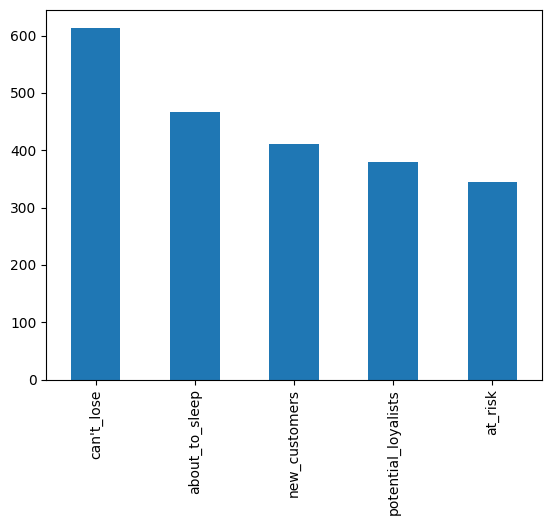

In [30]:
#Plotting the segment data to check its trend
rfm["segment"].value_counts().plot(kind="bar");

In [31]:
#Now we are going to perform CLTV
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00000,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00000,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00000,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00000,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00000,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.00000,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00000,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00000,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00000,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.00000,5588.35334,3249.37627,0.00000,2814.75000,5458.50000,8421.75000,11191.00000
Year_Birth,2216.00000,1968.82040,11.98555,1893.00000,1959.00000,1970.00000,1977.00000,1996.00000
Income,2216.00000,52247.25135,25173.07666,1730.00000,35303.00000,51381.50000,68522.00000,666666.00000
Kidhome,2216.00000,0.44179,0.53690,0.00000,0.00000,0.00000,1.00000,2.00000
Teenhome,2216.00000,0.50542,0.54418,0.00000,0.00000,0.00000,1.00000,2.00000
Recency,2216.00000,49.01264,28.94835,0.00000,24.00000,49.00000,74.00000,99.00000
MntWines,2216.00000,305.09161,337.32792,0.00000,24.00000,174.50000,505.00000,1493.00000
MntFruits,2216.00000,26.35605,39.79392,0.00000,2.00000,8.00000,33.00000,199.00000
MntMeatProducts,2216.00000,166.99594,224.28327,0.00000,16.00000,68.00000,232.25000,1725.00000
MntFishProducts,2216.00000,37.63764,54.75208,0.00000,3.00000,12.00000,50.00000,259.00000


In [33]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [57]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [58]:
df["Dt_Customer"]

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [59]:
# The provided code appears to be attempting to find the maximum "Dt_Customer" date in a DataFrame (df)
# and then retrieve the corresponding "Recency" value for that maximum date, sorting the values in descending order and displaying the top 1 value.
df.loc[(df["Dt_Customer"] == df["Dt_Customer"].max(), "Recency")].sort_values(ascending=False).head(1)

200    50
Name: Recency, dtype: int64

In [60]:
#Find the value of Maximum value of data in enrollment
df["Dt_Customer"].max()

Timestamp('2014-06-29 00:00:00')

In [61]:
#Now we are going to put the current day in the date and time data frame
current_Day = dt.datetime(2015, 1, 6)

In [62]:
current_Day

datetime.datetime(2015, 1, 6, 0, 0)

In [63]:
#Add the frquency in this Dataframe according to the frequency of the previous Dataframe
df["frequency"]=rfm.frequency
#Add the monitization according to the previous Dataframe
df["monetary"]=rfm.monetary

In [64]:
#Creating CLTV
cltv_df=pd.DataFrame()

In [65]:
#Monitizaion average = (monetary)/(frequency)
df["monetary_avg"]=rfm["monetary"] / rfm["frequency"]

In [66]:
#First argument gives the Date of Customer = Current Day - x
#then the Recency is equal to x
#Monetary average is equal to x
#Frequency is equal to x
cltv_df = df.groupby("ID").agg({"Dt_Customer":lambda x: (current_Day - x).dt.days,
                               "Recency": lambda x: x,
                               "monetary_avg": lambda x: x,
                              "frequency": lambda x: x})

In [67]:
#Cltv Column has T , Recency , Monetary , Frequency
cltv_df.columns=["T","Recency","Monetary","Frequency"]

In [70]:
#We get all the frequencies which are greater than 0
cltv_df=cltv_df[(cltv_df["Frequency"] > 0)]

In [71]:
#Then we check the Dataframe again so that we have the information of current Dataset
cltv_df

,T,Recency,Monetary,Frequency
ID,,,,
0,612,66,70.47059,17
1,205,0,26.22727,22
9,871,86,8.00000,15
13,533,57,3.20000,10
17,487,81,35.44828,29
...,...,...,...,...
11176,239,12,26.05263,19
11178,289,69,2.90909,11
11187,596,23,6.27273,11


In [72]:
# Recency = Recency/7
# T = T/7
cltv_df["Recency"]=cltv_df["Recency"]/7
cltv_df["T"] = cltv_df["T"]/7

In [73]:
#Get the maximum value of Recency
cltv_df["Recency"].max()

14.142857142857142

In [75]:
#Get the minimum value of T the date of Current Day - x
cltv_df["T"].min()

27.285714285714285

In [76]:
cltv_df

,T,Recency,Monetary,Frequency
ID,,,,
0,87.42857,9.42857,70.47059,17
1,29.28571,0.00000,26.22727,22
9,124.42857,12.28571,8.00000,15
13,76.14286,8.14286,3.20000,10
17,69.57143,11.57143,35.44828,29
...,...,...,...,...
11176,34.14286,1.71429,26.05263,19
11178,41.28571,9.85714,2.90909,11
11187,85.14286,3.28571,6.27273,11


In [77]:
#Model is Beta Geo Fitter

bgf=BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv_df["Frequency"],cltv_df["Recency"],cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 2214 subjects, a: 1.09, alpha: 0.05, b: 10.92, r: 0.51>

In [81]:
#Customers to place most order in 3 Month Period
bgf.predict(12,cltv_df["Frequency"],cltv_df["Recency"],cltv_df["T"]).sort_values(ascending=False).head(8)

ID
10492   0.46089
6382    0.14465
7212    0.01242
868     0.01242
3266    0.00942
574     0.00942
1010    0.00818
1743    0.00595
dtype: float64

In [82]:
#Customers to place most order in 4 Month Period
bgf.predict(16,cltv_df["Frequency"],cltv_df["Recency"],cltv_df["T"]).sort_values(ascending=False).head(8)

ID
10492   0.59919
6382    0.18701
7212    0.01603
868     0.01603
3266    0.01226
574     0.01226
1010    0.01064
1743    0.00769
dtype: float64

In [83]:
#Customers to place most order in 6 Month Period
bgf.predict(24,cltv_df["Frequency"],cltv_df["Recency"],cltv_df["T"]).sort_values(ascending=False).head(8)

ID
10492   0.85707
6382    0.26487
868     0.02265
7212    0.02265
574     0.01757
3266    0.01757
1010    0.01525
4796    0.01102
dtype: float64

In [84]:
#Creating a GAMMA GAMMA model
ggf=GammaGammaFitter(penalizer_coef=0.01)

In [85]:
#Fit the model according to frequency and Monetary
ggf.fit(cltv_df["Frequency"],cltv_df["Monetary"])

<lifetimes.GammaGammaFitter: fitted with 2214 subjects, p: 2.26, q: 0.71, v: 2.28>

In [86]:
#Monetary value left to us per Customer
ggf.conditional_expected_average_profit(cltv_df['Frequency'],
                                        cltv_df['Monetary']).sort_values(ascending=False).head(10)

ID
1173    162.50751
7962    160.31873
737     150.16828
5350    141.41123
5735    141.41123
10479   139.19253
7959    126.22329
1150    124.75117
11071   121.30160
1577    116.88397
dtype: float64

In [87]:
# Calculation CLTV with BG-NBD and GAMMA-GAMMA Model
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['Frequency'],
                                   cltv_df['Recency'],
                                   cltv_df['T'],
                                   cltv_df['Monetary'],
                                   time=3,  # 3
                                   freq="W",  # T
                                   discount_rate=0.01)

In [89]:
#Sort the values in descending
cltv.sort_values(ascending=False)

ID
10492   1.22973
6382    1.09294
1743    0.46429
3266    0.16127
574     0.16127
          ...  
8432    0.00000
5430    0.00000
10968   0.00000
4073    0.00000
7030    0.00000
Name: clv, Length: 2214, dtype: float64

In [90]:
cltv_final = cltv_df.merge(cltv, on="ID", how="left")

In [91]:
cltv_final.sort_values("clv", ascending=False).head(10)

,T,Recency,Monetary,Frequency,clv
ID,,,,,
10492,28.00000,13.71429,2.00000,5,1.22973
6382,27.71429,13.85714,6.75000,8,1.09294
1743,32.14286,14.14286,72.81818,11,0.46429
3266,36.85714,13.71429,15.62500,8,0.16127
574,36.85714,13.71429,15.62500,8,0.16127
1503,83.14286,4.42857,53.50000,2,0.15478
2939,28.28571,13.71429,101.93750,16,0.10465
1010,36.71429,13.42857,9.75000,8,0.08830
868,30.28571,14.14286,5.90909,11,0.08118


In [92]:
#Creating the Customer Segment
cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

In [93]:
cltv_final

,T,Recency,Monetary,Frequency,clv,segment
ID,,,,,,
0,87.42857,9.42857,70.47059,17,0.00000,B
1,29.28571,0.00000,26.22727,22,0.00000,D
9,124.42857,12.28571,8.00000,15,0.00000,B
13,76.14286,8.14286,3.20000,10,0.00000,A
17,69.57143,11.57143,35.44828,29,0.00000,C
...,...,...,...,...,...,...
11176,34.14286,1.71429,26.05263,19,0.00000,C
11178,41.28571,9.85714,2.90909,11,0.00001,A
11187,85.14286,3.28571,6.27273,11,0.00000,B


In [94]:
cltv_final.groupby("segment").agg({"count", "mean", "sum"})

T                   Recency                  Monetary        \
            mean count         sum    mean count        sum     mean count   
segment                                                                      
D       92.52587   555 51351.85714 3.60335   555 1999.85714 40.29679   555   
C       87.38095   552 48234.28571 6.61879   552 3653.57143 33.80136   552   
B       77.28442   553 42738.28571 8.05993   553 4457.14286 24.55288   553   
A       54.03816   554 29937.14286 9.71429   554 5381.71429 16.23779   554   

                    Frequency                  clv                
                sum      mean count    sum    mean count     sum  
segment                                                           
D       22364.72077  23.98378   555  13311 0.00000   555 0.00000  
C       18658.35284  19.63587   552  10839 0.00000   552 0.00000  
B       13577.74170  15.71790   553   8692 0.00000   553 0.00000  
A        8995.73429  12.22383   554   6772 0.00707   554 3.91948